In [1]:
# load required libraries and set up the paths 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
# import the training and testing data sets 
train_path = r"C:\Users\DELL\Desktop\My projects\Deeptech ready program\Machine learning\boat data\train"
test_path = r"C:\Users\DELL\Desktop\My projects\Deeptech ready program\Machine learning\boat data\test"
img_size = (128, 128)
batch_size = 32

In [2]:
# loading and preprocessing training and validation data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3830 images belonging to 24 classes.
Found 944 images belonging to 24 classes.


The above code will:
- Normalize pixel values
- Split the training data into 80% training and 20% validation
- Apply basic augmentation to improve generalization


In [5]:
#Building a simple CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\DELL\Desktop\My projects\work\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,395,416 (28.21 MB)

 Trainable params: 7,395,416 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

Model Summary Highlights
- Conv2D layers: Extract spatial features from the images.
- MaxPooling2D layers: Downsample the feature maps to reduce computation.
- Flatten layer: Converts the 3D feature maps into a 1D vector.
- Dense layers:
- First dense layer with 128 neurons learns complex patterns.
- Final dense layer with 24 neurons matches your 24 boat classes.


In [6]:
# Training the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

c:\Users\DELL\Desktop\My projects\work\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 74s 589ms/step - accuracy: 0.5256 - loss: 1.7089 - val_accuracy: 0.5477 - val_loss: 1.5332
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 83s 693ms/step - accuracy: 0.6692 - loss: 1.1962 - val_accuracy: 0.6367 - val_loss: 1.2934
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 576ms/step - accuracy: 0.7068 - loss: 1.0099 - val_accuracy: 0.6515 - val_loss: 1.1921
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 535ms/step - accuracy: 0.7483 - loss: 0.8714 - val_accuracy: 0.6504 - val_loss: 1.1996
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 66s 551ms/step - accuracy: 0.7734 - loss: 0.7788 - val_accuracy: 0.6186 - val_loss: 1.2898
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 64s 533ms/step - accuracy: 0.7890 - loss: 0.7192 - val_accuracy: 0.6970 - val_loss: 1.1086
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 62s 516ms/step - accuracy: 0.8034 - loss: 0.6548 - val_accuracy: 0.6716 - val_loss: 1.0872
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 478ms/step - accuracy: 0.8146 - loss: 0

Training Insights
- Training Accuracy steadily improved from ~52% to ~84%, which is a strong sign the model is learning well.
- Validation Accuracy peaked around 65%, then dipped slightly — this could indicate:
- Slight overfitting (model is learning training data too well)
- Class imbalance or noisy validation samples
- Loss values also dropped, which confirms the model is optimizing.


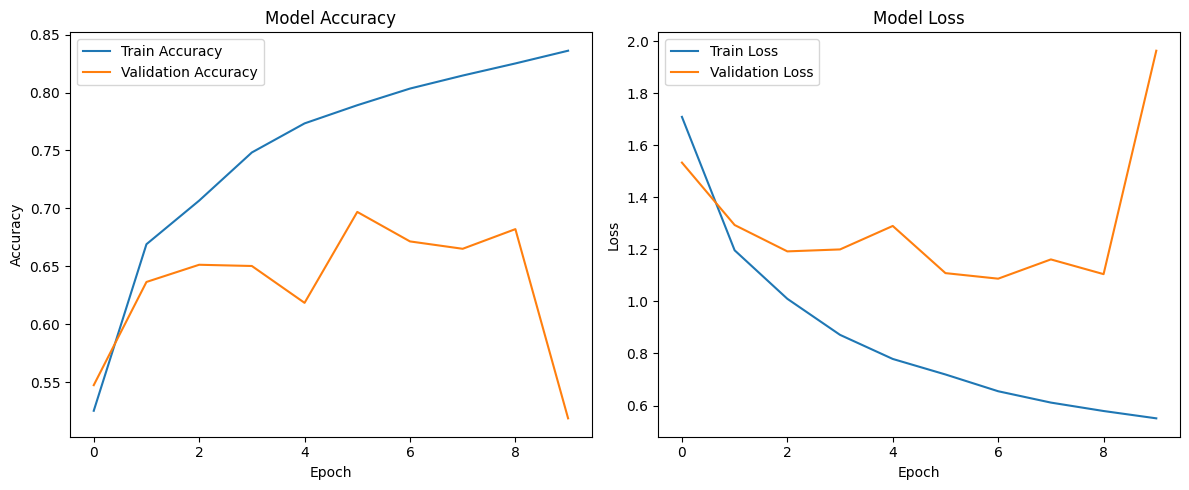

In [7]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

 Training Accuracy & Loss
- Accuracy steadily climbed from ~54% to ~84% which is an excellent learning progress.
- Loss dropped consistently from ~1.7 to ~0.6 the model is optimizing well.
 Validation Accuracy & Loss
- Accuracy fluctuated between ~63% and ~70%, then dipped this inconsistency suggests:
- Possible overfitting: the model is learning training data too well but struggling to generalize.
- Class imbalance or noisy samples in validation set.
- Loss didn’t show a clear downward trend another sign of generalization issues.


In [8]:
# updating the model to include Dropout for better generalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout added here
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Dropout randomly disables neurons during training, which:
- Prevents overfitting
- Forces the model to learn more robust features
- Helps generalize better to unseen data


In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 73s 578ms/step - accuracy: 0.4721 - loss: 2.0183 - val_accuracy: 0.5572 - val_loss: 1.5510
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 495ms/step - accuracy: 0.5990 - loss: 1.4945 - val_accuracy: 0.5879 - val_loss: 1.4785
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 58s 482ms/step - accuracy: 0.6517 - loss: 1.3022 - val_accuracy: 0.6472 - val_loss: 1.2926
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 58s 482ms/step - accuracy: 0.6856 - loss: 1.1741 - val_accuracy: 0.6780 - val_loss: 1.1897
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 57s 478ms/step - accuracy: 0.7000 - loss: 1.0844 - val_accuracy: 0.6589 - val_loss: 1.1779
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 59s 495ms/step - accuracy: 0.7170 - loss: 1.0456 - val_accuracy: 0.6229 - val_loss: 1.3215
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 61s 504ms/step - accuracy: 0.7157 - loss: 1.0035 - val_accuracy: 0.6483 - val_loss: 1.2502
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 465s 4s/step - accuracy: 0.7269 - loss: 0.9

EarlyStopping monitors validation loss and stops training when:
- The model stops improving
- It restores the best weights automatically
- Reduce Overfitting


In [10]:
# loading and preprocessing a single image for prediction
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"C:\Users\DELL\Desktop\20130412_061728_14274.jpg"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [11]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])
class_labels = list(train_generator.class_indices.keys())
print("Predicted class:", class_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicted class: VaporettoACTV


In [12]:
# Batch prediction on test dataset
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

test_path = r"C:\Users\DELL\Desktop\test"
class_labels = list(train_generator.class_indices.keys())
results = []

for img_name in os.listdir(test_path):
    img_path = os.path.join(test_path, img_name)
    try:
        img = image.load_img(img_path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction[0])]
        results.append({'filename': img_name, 'label': predicted_class})
    except Exception as e:
        print(f"Error with {img_name}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━

In [13]:
submissions = pd.DataFrame(results)
submissions.to_csv("submissions.csv", index=False)